In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
file = open('test_results', 'rb')
test_results = pickle.load(file)
file.close()
test_results.keys()

dict_keys(['10 parameters', '20 parameters', '30 parameters', '40 parameters', '50 parameters'])

# time until convergence

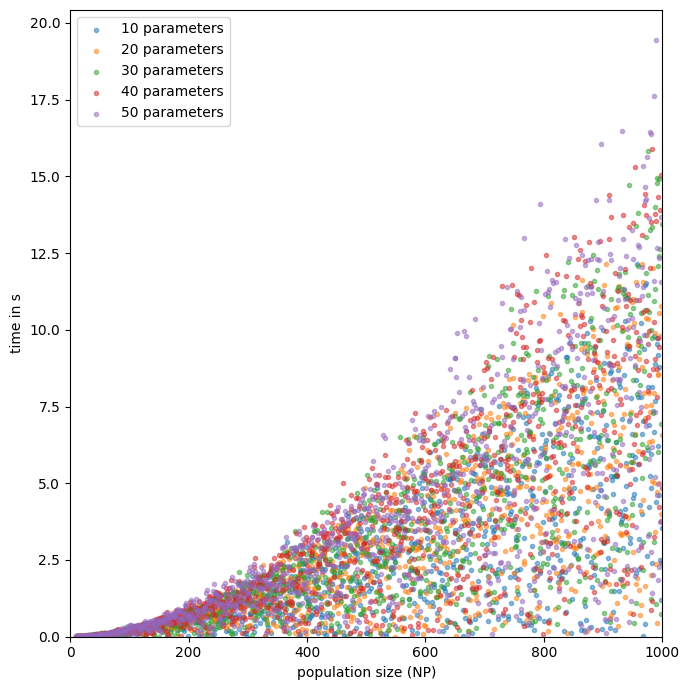

In [4]:
NP = range(10,1000)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for key in test_results.keys():
    ax.scatter(NP, test_results[key]["times total"], marker='.', alpha=0.5, label=key)

ax.legend()
ax.set_xlabel("population size (NP)")
ax.set_ylabel("time in s")
ax.set_xlim(0,1000)
ax.set_ylim(0)
fig.tight_layout()
plt.show()

# time for one iteration

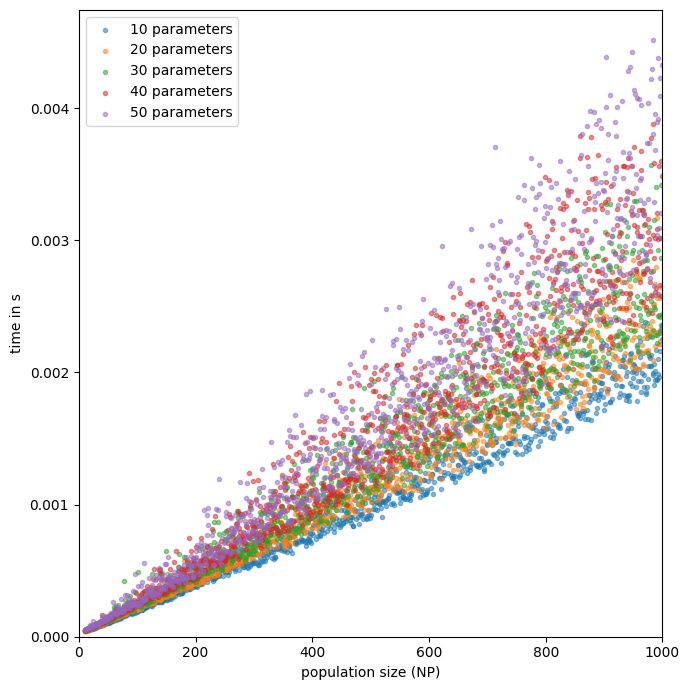

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for key in test_results.keys():
    ax.scatter(NP, test_results[key]["times update"], marker='.', alpha=0.5, label=key)

ax.legend()
ax.set_xlabel("population size (NP)")
ax.set_ylabel("time in s")
ax.set_xlim(0,1000)
ax.set_ylim(0)
fig.tight_layout()
plt.show()

# number of iterations until convergence

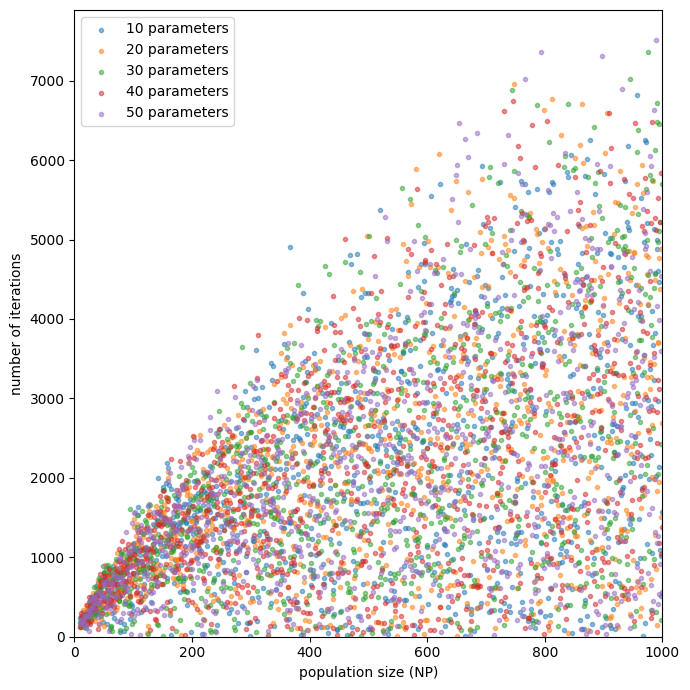

In [6]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for key in test_results.keys():
    ax.scatter(NP, test_results[key]["iterations"], marker='.', alpha=0.5, label=key)

ax.legend()
ax.set_xlabel("population size (NP)")
ax.set_ylabel("number of iterations")
ax.set_xlim(0,1000)
ax.set_ylim(0)
fig.tight_layout()
plt.show()

# ToDo's:

- explore coverage of the parameter space
- observe different values for F and Cr
- create more objective functions

# polynomial funcion

In [7]:
def polynomial(x:float, y:float) -> float:
    return np.pow((x**2-1),2) + np.pow((y**2-1),2)


In [9]:
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)
X,Y = np.meshgrid(x,y)
Z = polynomial(X,Y)

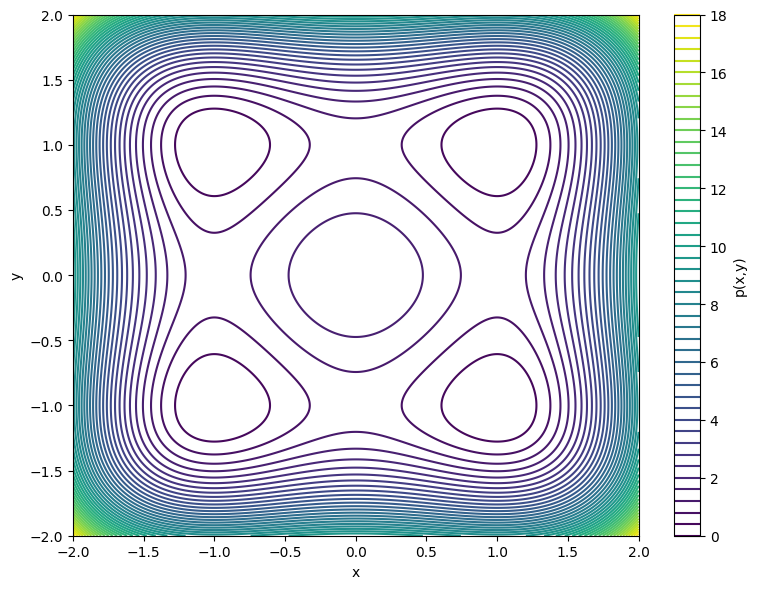

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

contour = ax.contour(X,Y,Z, levels=50)

ax.set_xlabel("x")
ax.set_ylabel("y")  

fig.colorbar(contour, label="p(x,y)")
fig.tight_layout()

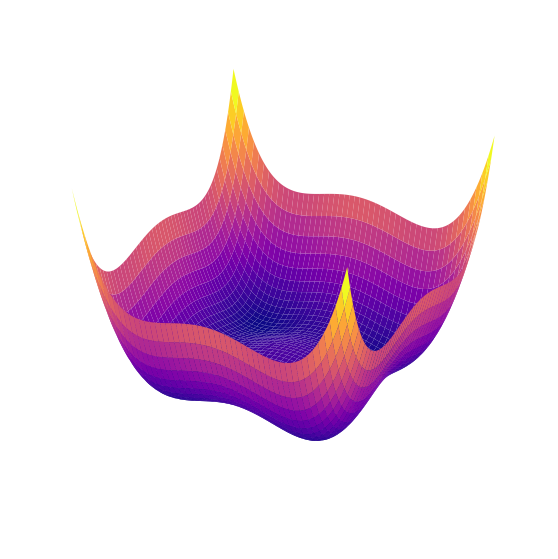

In [18]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Z, cmap='plasma')

ax.set_axis_off()

# parabolic

In [19]:
def parabolic(x:float, y:float) -> float:
    return x**2 + y**2

In [20]:
Z = parabolic(X,Y)

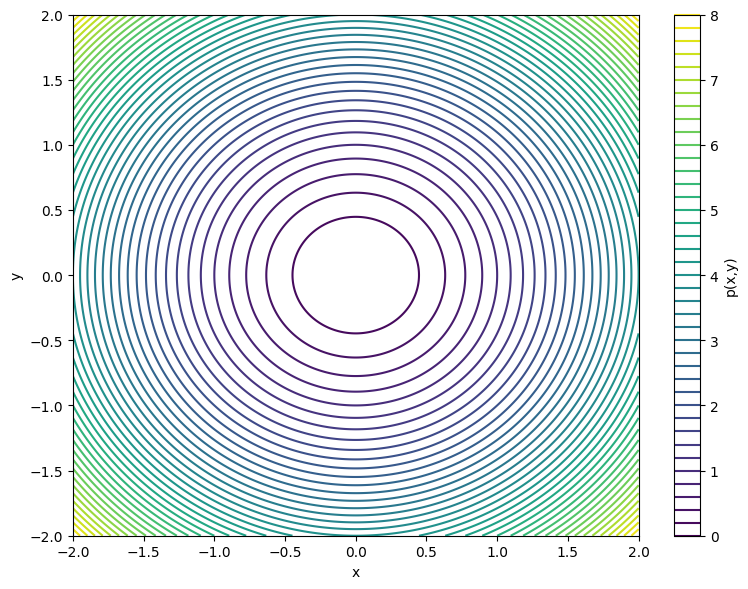

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

contour = ax.contour(X,Y,Z, levels=50)

ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, label="p(x,y)")
fig.tight_layout()

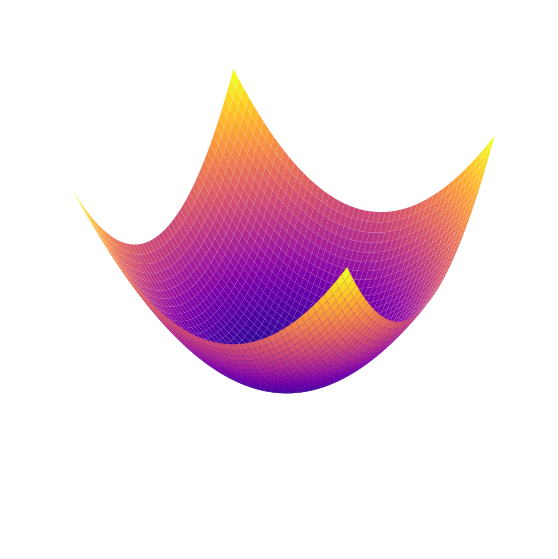

In [23]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Z, cmap='plasma')

ax.set_axis_off()